In [1]:
#Install Dependencies
!pip install mlxtend scikit-learn

In [9]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Load the Dataset with correct separator
df = pd.read_csv('winequality-red.csv', sep=';')

In [11]:
#Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()

In [12]:
#Check the dataset
print("📊 DataFrame Shape:", df.shape)
print("📋 Column Names:", df.columns)
df.head()

📊 DataFrame Shape: (1599, 1)
📋 Column Names: Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality'], dtype='object')


,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [17]:
with open('winequality-red.csv', 'r') as file:
    for i in range(5):
        print(file.readline())

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality

7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5

7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5

7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5

11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6



In [18]:
df = pd.read_csv('winequality-red.csv', sep=',')

In [19]:
#Prepare Features and Target
X = df.drop('quality', axis=1)
y = df['quality']

In [20]:
#Train-Test Split and Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📉 Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("📈 R² Score:", round(r2_score(y_test, y_pred), 2))

# Coefficients
print("\n📊 Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

📉 Mean Squared Error: 0.41
📈 R² Score: 0.35

📊 Feature Coefficients:
fixed acidity: 0.0235
volatile acidity: -1.0996
citric acid: -0.2479
residual sugar: 0.0077
chlorides: -1.6736
free sulfur dioxide: 0.0046
total sulfur dioxide: -0.0033
density: -14.2396
pH: -0.3192
sulphates: 0.8128
alcohol: 0.2920


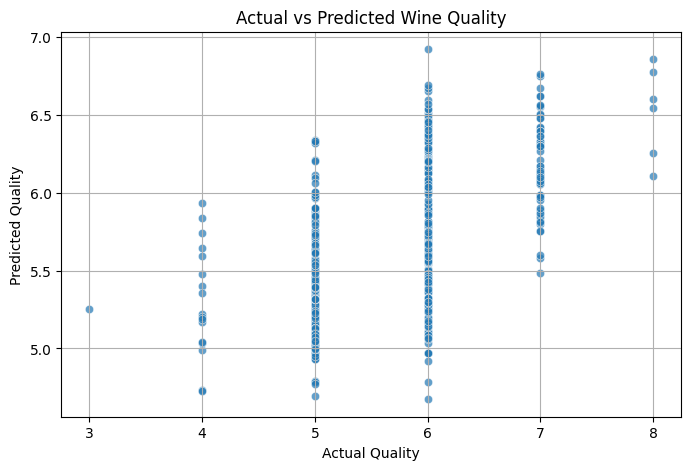

In [21]:
#Optional Plot – Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.grid(True)
plt.show()